In [1]:
import matplotlib.pyplot as plt
import torch

from galactic_wavelets.erosion import mask_erosion_torch

In [2]:
N = 16
M = 12
r = 3

domain = torch.zeros((N,N), dtype=bool)
domain[N//4:3*N//4, N//4:3*N//4] = True
mask = torch.logical_not(domain)

xg, yg = torch.meshgrid(torch.arange(M), torch.arange(M), indexing='ij')
kernel = (xg - M//2)**2 + (yg - M//2)**2 < r**2
kernel = torch.fft.ifftshift(kernel)

In [3]:
def plot_erosion(mask, mask_eroded, kernel):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].pcolormesh(mask.T, cmap="gray_r", edgecolors='k', linewidth=2)
    axs[0].pcolormesh(mask_eroded.T, cmap="gray_r", alpha=0.5, edgecolors='k', linewidth=2)
    axs[1].axvline(M//2 + 0.5, color="b", linestyle="--")
    axs[1].axhline(M//2 + 0.5, color="b", linestyle="--")
    axs[1].pcolormesh(torch.fft.fftshift(kernel.T), cmap="gray", edgecolors='k', linewidth=2)
    axs[1].set_xlim((0, N))
    axs[1].set_ylim((0, N))
    fig.show()

/tmp/ipykernel_98247/2629439329.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


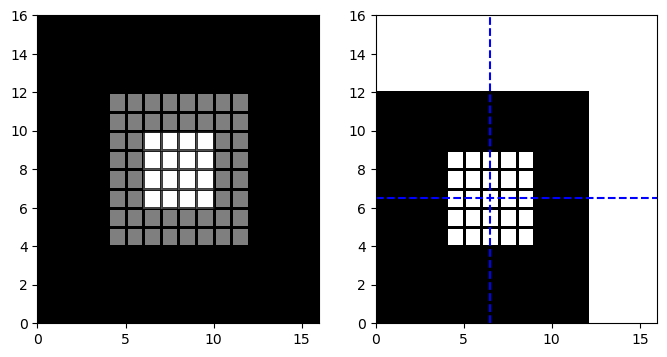

In [4]:
mask_eroded = mask_erosion_torch(mask, kernel)

plot_erosion(mask, mask_eroded, kernel)

In [5]:
r = 3
kernel = (xg - M//2)**2/0.5**2 + (yg - M//2)**2/1**2 < r**2
kernel = torch.fft.fftshift(kernel)

/tmp/ipykernel_98247/2629439329.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


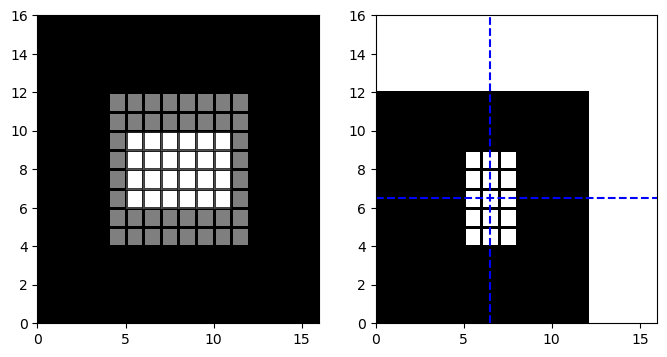

In [6]:
mask_eroded = mask_erosion_torch(mask, kernel)

plot_erosion(mask, mask_eroded, kernel)

In [7]:
kernel[:, -2] = False

/tmp/ipykernel_98247/2629439329.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


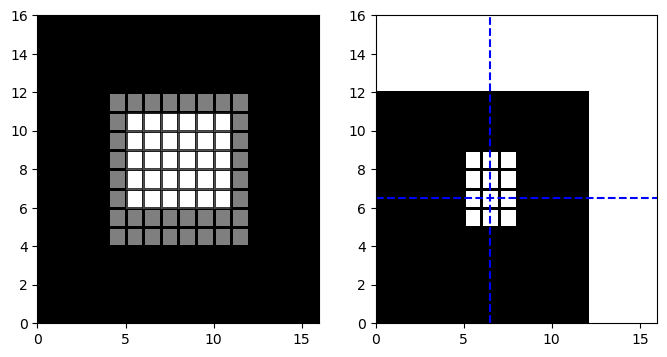

In [8]:
mask_eroded = mask_erosion_torch(mask, kernel)

plot_erosion(mask, mask_eroded, kernel)